# Exercícios de mosaico de gráficos

Considere os dados da primeira célula para um aplicativo de uma pequena empresa de software. Faça um mosaico com 4 gráficos:

1. Gráfico de linhas com os novos usuários por mês
2. Gráfico de barras com a receita mensal
3. Gráfico de linhas com os usuários ativos diários
4. Gráfico de barras empilhadas com os tickets de suporte abertos e fechados

Os gráficos 1 e 2 devem ter uma linha própria no mosaico. Os gráficos 3 e 4 devem compartilhar a mesma linha.


In [38]:
#linha
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
novos_usuarios = [100, 80, 110, 140, 150, 160, 170, 120, 110, 150, 200, 140]

usuarios_ativos_diarios = [1000, 750, 900, 1300, 1400, 1500, 1200, 1200, 1500, 1900, 2000, 1800] #linhas

receita_mensal = [10000, 8500, 9800, 10000, 11000, 12000, 10000, 10500, 13000, 13000, 20000, 17000] #barras

tickets_suporte_abertos = [110, 75, 100, 140, 170, 160, 100, 130, 190, 200, 210, 140] #barrasempilhadas
tickets_suporte_fechados = [100, 85, 100, 120, 130, 150, 140, 110, 130, 120, 150, 200] #barrasempilhadas


C:\Users\Pichau\AppData\Local\Temp\ipykernel_16484\4250784373.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs['A'].legend()


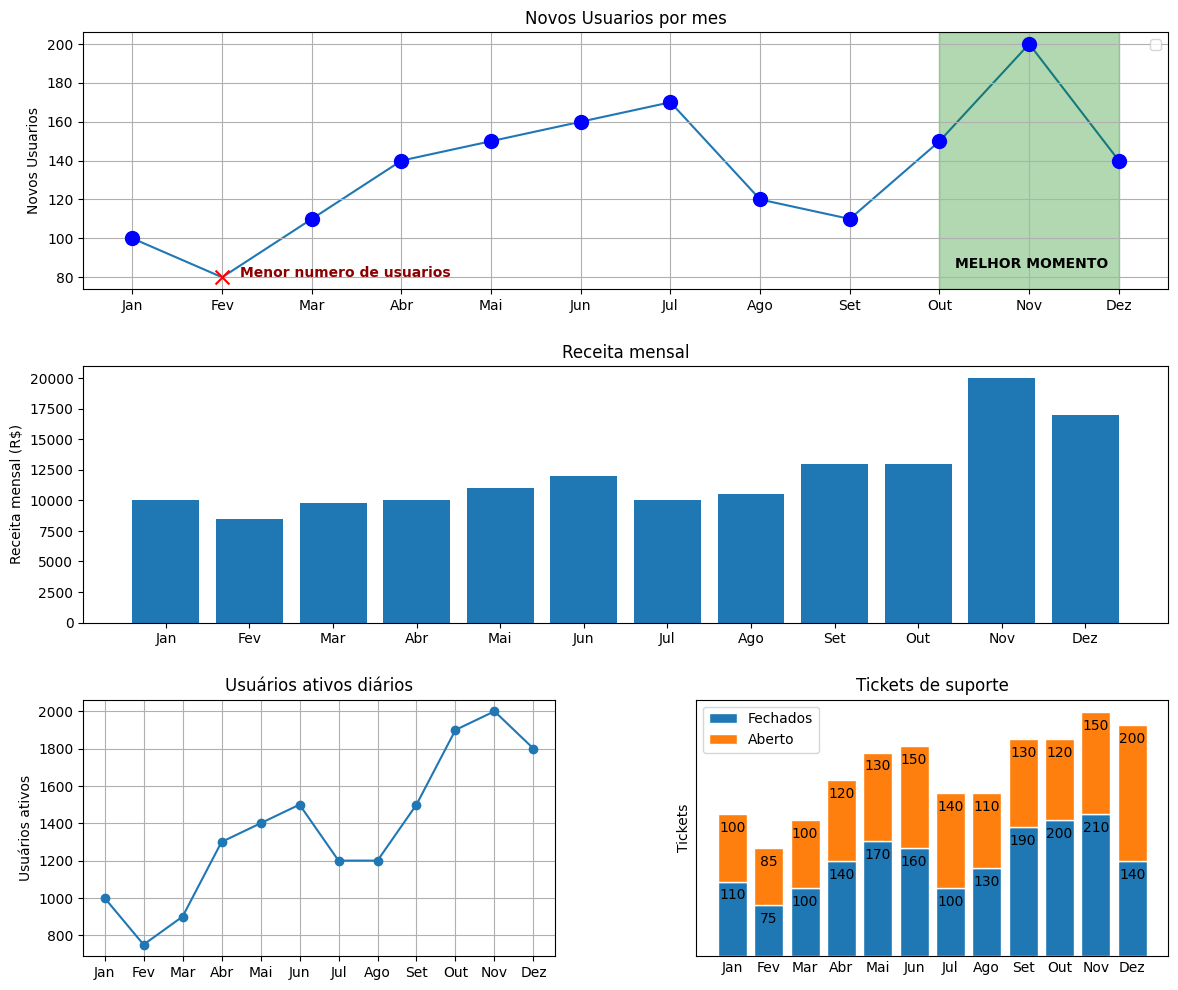

In [69]:
import matplotlib.pyplot as plt
import numpy as np


mosaico = 'AA;BB;CD'
espacamento = {'wspace' : 0.3, 'hspace' : 0.3}
fig, axs = plt.subplot_mosaic(mosaico , figsize = (14, 12),  gridspec_kw=espacamento)

marcar_menor =  np.where(novos_usuarios == np.min(novos_usuarios), 'x', 'o')

a = axs['A'].plot(meses, novos_usuarios, zorder=0)
#axs['A'].scatter(meses, novos_usuarios, marker='o', zorder=2, color='red')
axs['A'].annotate('Menor numero de usuarios', color='darkred', xy=(1.2,80), xytext=(1.2,80), fontweight='bold', )

for i, valor in enumerate(marcar_menor):
    if valor == 'x':
        cor = 'red'
    else:
        cor = 'blue'
    axs['A'].scatter(meses[i], novos_usuarios[i], marker=valor, zorder=2, color=cor, s=100)

axs['A'].axvspan(9, 11, color='green', alpha=0.3)
axs['A'].text(9.175, 85, 'MELHOR MOMENTO', weight='bold', fontsize=10)

axs['A'].grid(True)
axs['A'].set_ylabel('Novos Usuarios')
axs['A'].set_title('Novos Usuarios por mes')
axs['A'].legend()

axs['B'].bar(meses, receita_mensal)
axs['B'].set_ylabel('Receita mensal (R$)')
axs['B'].set_title('Receita mensal')



axs['C'].plot(meses,usuarios_ativos_diarios, marker='o')
axs['C'].grid(True)
axs['C'].set_ylabel('Usuários ativos')
axs['C'].set_title('Usuários ativos diários')


aberto = axs['D'].bar(meses, tickets_suporte_abertos, label='Fechados', edgecolor='white')
fechado = axs['D'].bar(meses, tickets_suporte_fechados, bottom=tickets_suporte_abertos, label='Aberto', edgecolor='white')

plt.bar_label(aberto, labels=tickets_suporte_abertos, padding=-15)
plt.bar_label(fechado, labels=tickets_suporte_fechados, padding=-15)

axs['D'].set_ylabel('Tickets')
axs['D'].set_title('Tickets de suporte')
axs['D'].legend()
axs['D'].set_yticks([])
axs['D'].tick_params('x', length=0)

plt.show()